# Import Library

In [120]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
)
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import warnings
from lazypredict.Supervised import LazyClassifier

In [121]:
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Load the CSV file

In [122]:
# Load the data
data = pd.read_csv("dataset/data.csv")
df = pd.DataFrame(data.drop(["ID"], axis=1))

df.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.00,120.80,86.85,957,6601,0.36,0.22,103.83,0.05,...,0.14,0.02,5.60,3.18,71,40120,1749.28,296102.77,144605,P
1,51980,0.00,115.32,83.45,1694,6998,0.27,0.14,99.38,0.04,...,0.05,0.02,1.67,0.95,129,126700,1504.77,278744.28,298640,P
2,2600,0.00,229.93,172.76,2333,5802,0.39,0.18,201.35,0.06,...,0.18,0.02,4.00,2.39,74,45480,1431.44,144411.71,79025,P
3,2130,0.00,369.40,183.19,1756,8159,0.56,0.16,276.30,0.09,...,0.11,0.02,4.21,1.61,123,67945,1465.84,230184.72,181220,P
4,2310,0.00,258.00,111.28,987,4732,0.27,0.15,184.64,0.04,...,0.12,0.02,3.32,1.68,92,37285,1841.70,158290.03,72575,P


# Data preprocessing

## Convert categorical value to numerical value

In [123]:
encoder = LabelEncoder()
df["class_encoded"] = encoder.fit_transform(df["class"])
df = df.drop(["class"], axis=1)

df.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class_encoded
0,5160,0.00,120.80,86.85,957,6601,0.36,0.22,103.83,0.05,...,0.14,0.02,5.60,3.18,71,40120,1749.28,296102.77,144605,1
1,51980,0.00,115.32,83.45,1694,6998,0.27,0.14,99.38,0.04,...,0.05,0.02,1.67,0.95,129,126700,1504.77,278744.28,298640,1
2,2600,0.00,229.93,172.76,2333,5802,0.39,0.18,201.35,0.06,...,0.18,0.02,4.00,2.39,74,45480,1431.44,144411.71,79025,1
3,2130,0.00,369.40,183.19,1756,8159,0.56,0.16,276.30,0.09,...,0.11,0.02,4.21,1.61,123,67945,1465.84,230184.72,181220,1
4,2310,0.00,258.00,111.28,987,4732,0.27,0.15,184.64,0.04,...,0.12,0.02,3.32,1.68,92,37285,1841.70,158290.03,72575,1


## Features and target

In [124]:
# Independent (X) and Dependent (y) variable
X = df.drop(["class_encoded"], axis=1)
y = df["class_encoded"]

print(X, y)

     air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0         5160         0.00        120.80           86.85               957   
1        51980         0.00        115.32           83.45              1694   
2         2600         0.00        229.93          172.76              2333   
3         2130         0.00        369.40          183.19              1756   
4         2310         0.00        258.00          111.28               987   
..         ...          ...           ...             ...               ...   
169       2930         0.00        241.74          176.12              1839   
170       2140         0.00        274.73          234.50              2053   
171       3830         0.00        151.54          171.10              1287   
172       1760         0.00        289.52          196.41              1674   
173       2875         0.00        235.77          178.21              1838   

     max_y_extension1  mean_acc_in_air1  mean_acc_o

# EDA

## Data Summary

In [125]:
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 0 missing values in the data.


In [126]:
print("Data Summary:")
df.head()

Data Summary:


,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class_encoded
0,5160,0.00,120.80,86.85,957,6601,0.36,0.22,103.83,0.05,...,0.14,0.02,5.60,3.18,71,40120,1749.28,296102.77,144605,1
1,51980,0.00,115.32,83.45,1694,6998,0.27,0.14,99.38,0.04,...,0.05,0.02,1.67,0.95,129,126700,1504.77,278744.28,298640,1
2,2600,0.00,229.93,172.76,2333,5802,0.39,0.18,201.35,0.06,...,0.18,0.02,4.00,2.39,74,45480,1431.44,144411.71,79025,1
3,2130,0.00,369.40,183.19,1756,8159,0.56,0.16,276.30,0.09,...,0.11,0.02,4.21,1.61,123,67945,1465.84,230184.72,181220,1
4,2310,0.00,258.00,111.28,987,4732,0.27,0.15,184.64,0.04,...,0.12,0.02,3.32,1.68,92,37285,1841.70,158290.03,72575,1


In [127]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, air_time1 to class_encoded
dtypes: float64(300), int32(1), int64(150)
memory usage: 612.5 KB


In [128]:
print("Data Statistics:")
df.describe()

Data Statistics:


,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class_encoded
count,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00,...,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00,174.00
mean,5664.17,0.00,297.67,200.50,1977.97,7323.90,0.42,0.18,249.09,0.07,...,0.15,0.02,4.47,2.87,85.84,43109.71,1629.59,163061.77,164203.33,0.51
std,12653.77,0.00,183.94,111.63,1648.31,2188.29,0.38,0.06,132.70,0.07,...,0.06,0.00,1.50,0.85,27.49,19092.02,324.14,56845.61,496939.70,0.50
min,65.00,0.00,28.73,29.94,754.00,561.00,0.07,0.10,41.20,0.01,...,0.03,0.01,1.32,0.95,32.00,15930.00,474.05,26984.93,29980.00,0.00
25%,1697.50,0.00,174.15,136.52,1362.50,6124.00,0.22,0.15,161.14,0.03,...,0.11,0.02,3.49,2.40,66.00,32803.75,1499.11,120099.05,59175.00,0.00
50%,2890.00,0.00,255.79,176.49,1681.00,6975.50,0.28,0.16,224.45,0.04,...,0.14,0.02,4.51,2.83,81.00,37312.50,1729.39,158236.77,76115.00,1.00
75%,4931.25,0.00,358.92,234.05,2082.75,8298.50,0.44,0.19,294.39,0.07,...,0.20,0.02,5.21,3.34,101.50,46533.75,1865.63,200921.08,127542.50,1.00
max,109965.00,0.00,1168.33,865.21,18602.00,15783.00,2.77,0.63,836.78,0.54,...,0.38,0.03,10.42,5.60,209.00,139575.00,1999.78,352981.85,5704200.00,1.00


In [129]:
data.nunique()

ID                 174
air_time1          165
disp_index1        131
gmrt_in_air1       174
gmrt_on_paper1     174
                  ... 
paper_time25       159
pressure_mean25    161
pressure_var25     161
total_time25       161
class                2
Length: 452, dtype: int64

## Calculate mean, median, and mode

In [130]:
# Calculate mean, median, and mode
mean_values = X.mean()
median_values = X.median()
mode_values = X.mode().iloc[0]

In [131]:
print("Mean values:")
mean_values

Mean values:


air_time1            5664.17
disp_index1             0.00
gmrt_in_air1          297.67
gmrt_on_paper1        200.50
max_x_extension1     1977.97
                      ...   
num_of_pendown25       85.84
paper_time25        43109.71
pressure_mean25      1629.59
pressure_var25     163061.77
total_time25       164203.33
Length: 450, dtype: float64

In [132]:
print("Median values:")
median_values

Median values:


air_time1            2890.00
disp_index1             0.00
gmrt_in_air1          255.79
gmrt_on_paper1        176.49
max_x_extension1     1681.00
                      ...   
num_of_pendown25       81.00
paper_time25        37312.50
pressure_mean25      1729.39
pressure_var25     158236.77
total_time25        76115.00
Length: 450, dtype: float64

In [133]:
print("Mode values:")
mode_values

Mode values:


air_time1            465.00
disp_index1            0.00
gmrt_in_air1          28.73
gmrt_on_paper1        29.94
max_x_extension1    1035.00
                     ...   
num_of_pendown25      60.00
paper_time25       35920.00
pressure_mean25     1929.30
pressure_var25     94373.03
total_time25       59175.00
Name: 0, Length: 450, dtype: float64

## Distribution of the target variable 'class_encoded'

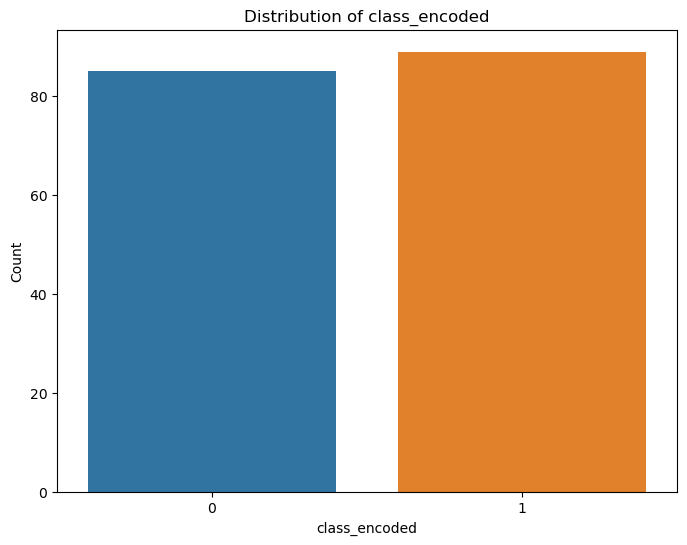

In [134]:
# Distribution of the target variable 'class_encoded'
plt.figure(figsize=(8, 6))
sns.countplot(x="class_encoded", data=df)
plt.title("Distribution of class_encoded")
plt.xlabel("class_encoded")
plt.ylabel("Count")
plt.show()

# Utility Function

In [135]:
# removed_classifiers = [
#     "ClassifierChain",
#     "ComplementNB",
#     "CategoricalNB",
#     "GradientBoostingClassifier",
#     "GaussianProcessClassifier",
#     "HistGradientBoostingClassifier",
#     "MLPClassifier",
#     "LogisticRegressionCV",
#     "MultiOutputClassifier",
#     "MultinomialNB",
#     "OneVsOneClassifier",
#     "OneVsRestClassifier",
#     "OutputCodeClassifier",
#     "RadiusNeighborsClassifier",
#     "VotingClassifier",
#     "KNeighborsClassifier",
#     "StackingClassifier",
# ]

# CLASSIFIERS = [
#     est
#     for est in all_estimators()
#     if (issubclass(est[1], ClassifierMixin) and (est[0] not in removed_classifiers))
# ]

# CLASSIFIERS


# def CustomLazyPredict(X_train, X_test, y_train, y_test, random_state=42):
#     models = []
#     for name, model in tqdm(CLASSIFIERS):
#         # print(name)
#         if "random_state" in model().get_params().keys():
#             classifier = model(random_state=random_state)
#         else:
#             classifier = model()
#         classifier.fit(X_train, y_train)
#         y_pred = classifier.predict(X_test)

#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred)
#         f1 = f1_score(y_test, y_pred)
#         sorted_value = np.average(abs(accuracy + precision + recall + f1))
#         # cv_score = cross_val_score(classifier, X_train, y_train, cv=5)

#         models.append(
#             {
#                 "name": name,
#                 "accuracy": accuracy,
#                 "precision": precision,
#                 "recall": recall,
#                 "f1": f1,
#                 # "cv_score": cv_score,
#                 "sorted_value": sorted_value,
#             }
#         )

#     models = sorted(models, key=lambda item: -item["sorted_value"])
#     return pd.DataFrame(models)


def get_figure_size(n):
    _x = max(min(n - 10, 30), 10)
    _y = max(min(n - 15, 20), 6)

    return (_x, _y)


def sorting_model_key(item):
    return item["sorted_value"]

# Split dataset into Train-Test

In [136]:
random_state = 123

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)


# scaler = StandardScaler()
# _X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# X_train, X_test, y_train, y_test = train_test_split(
#     _X, y, test_size=0.2, random_state=random_state
# )

# Features Importance

Max value: 0.027958215167417207
Min value: 4.093931198393649e-05
Total Number of Feature Importances: 386


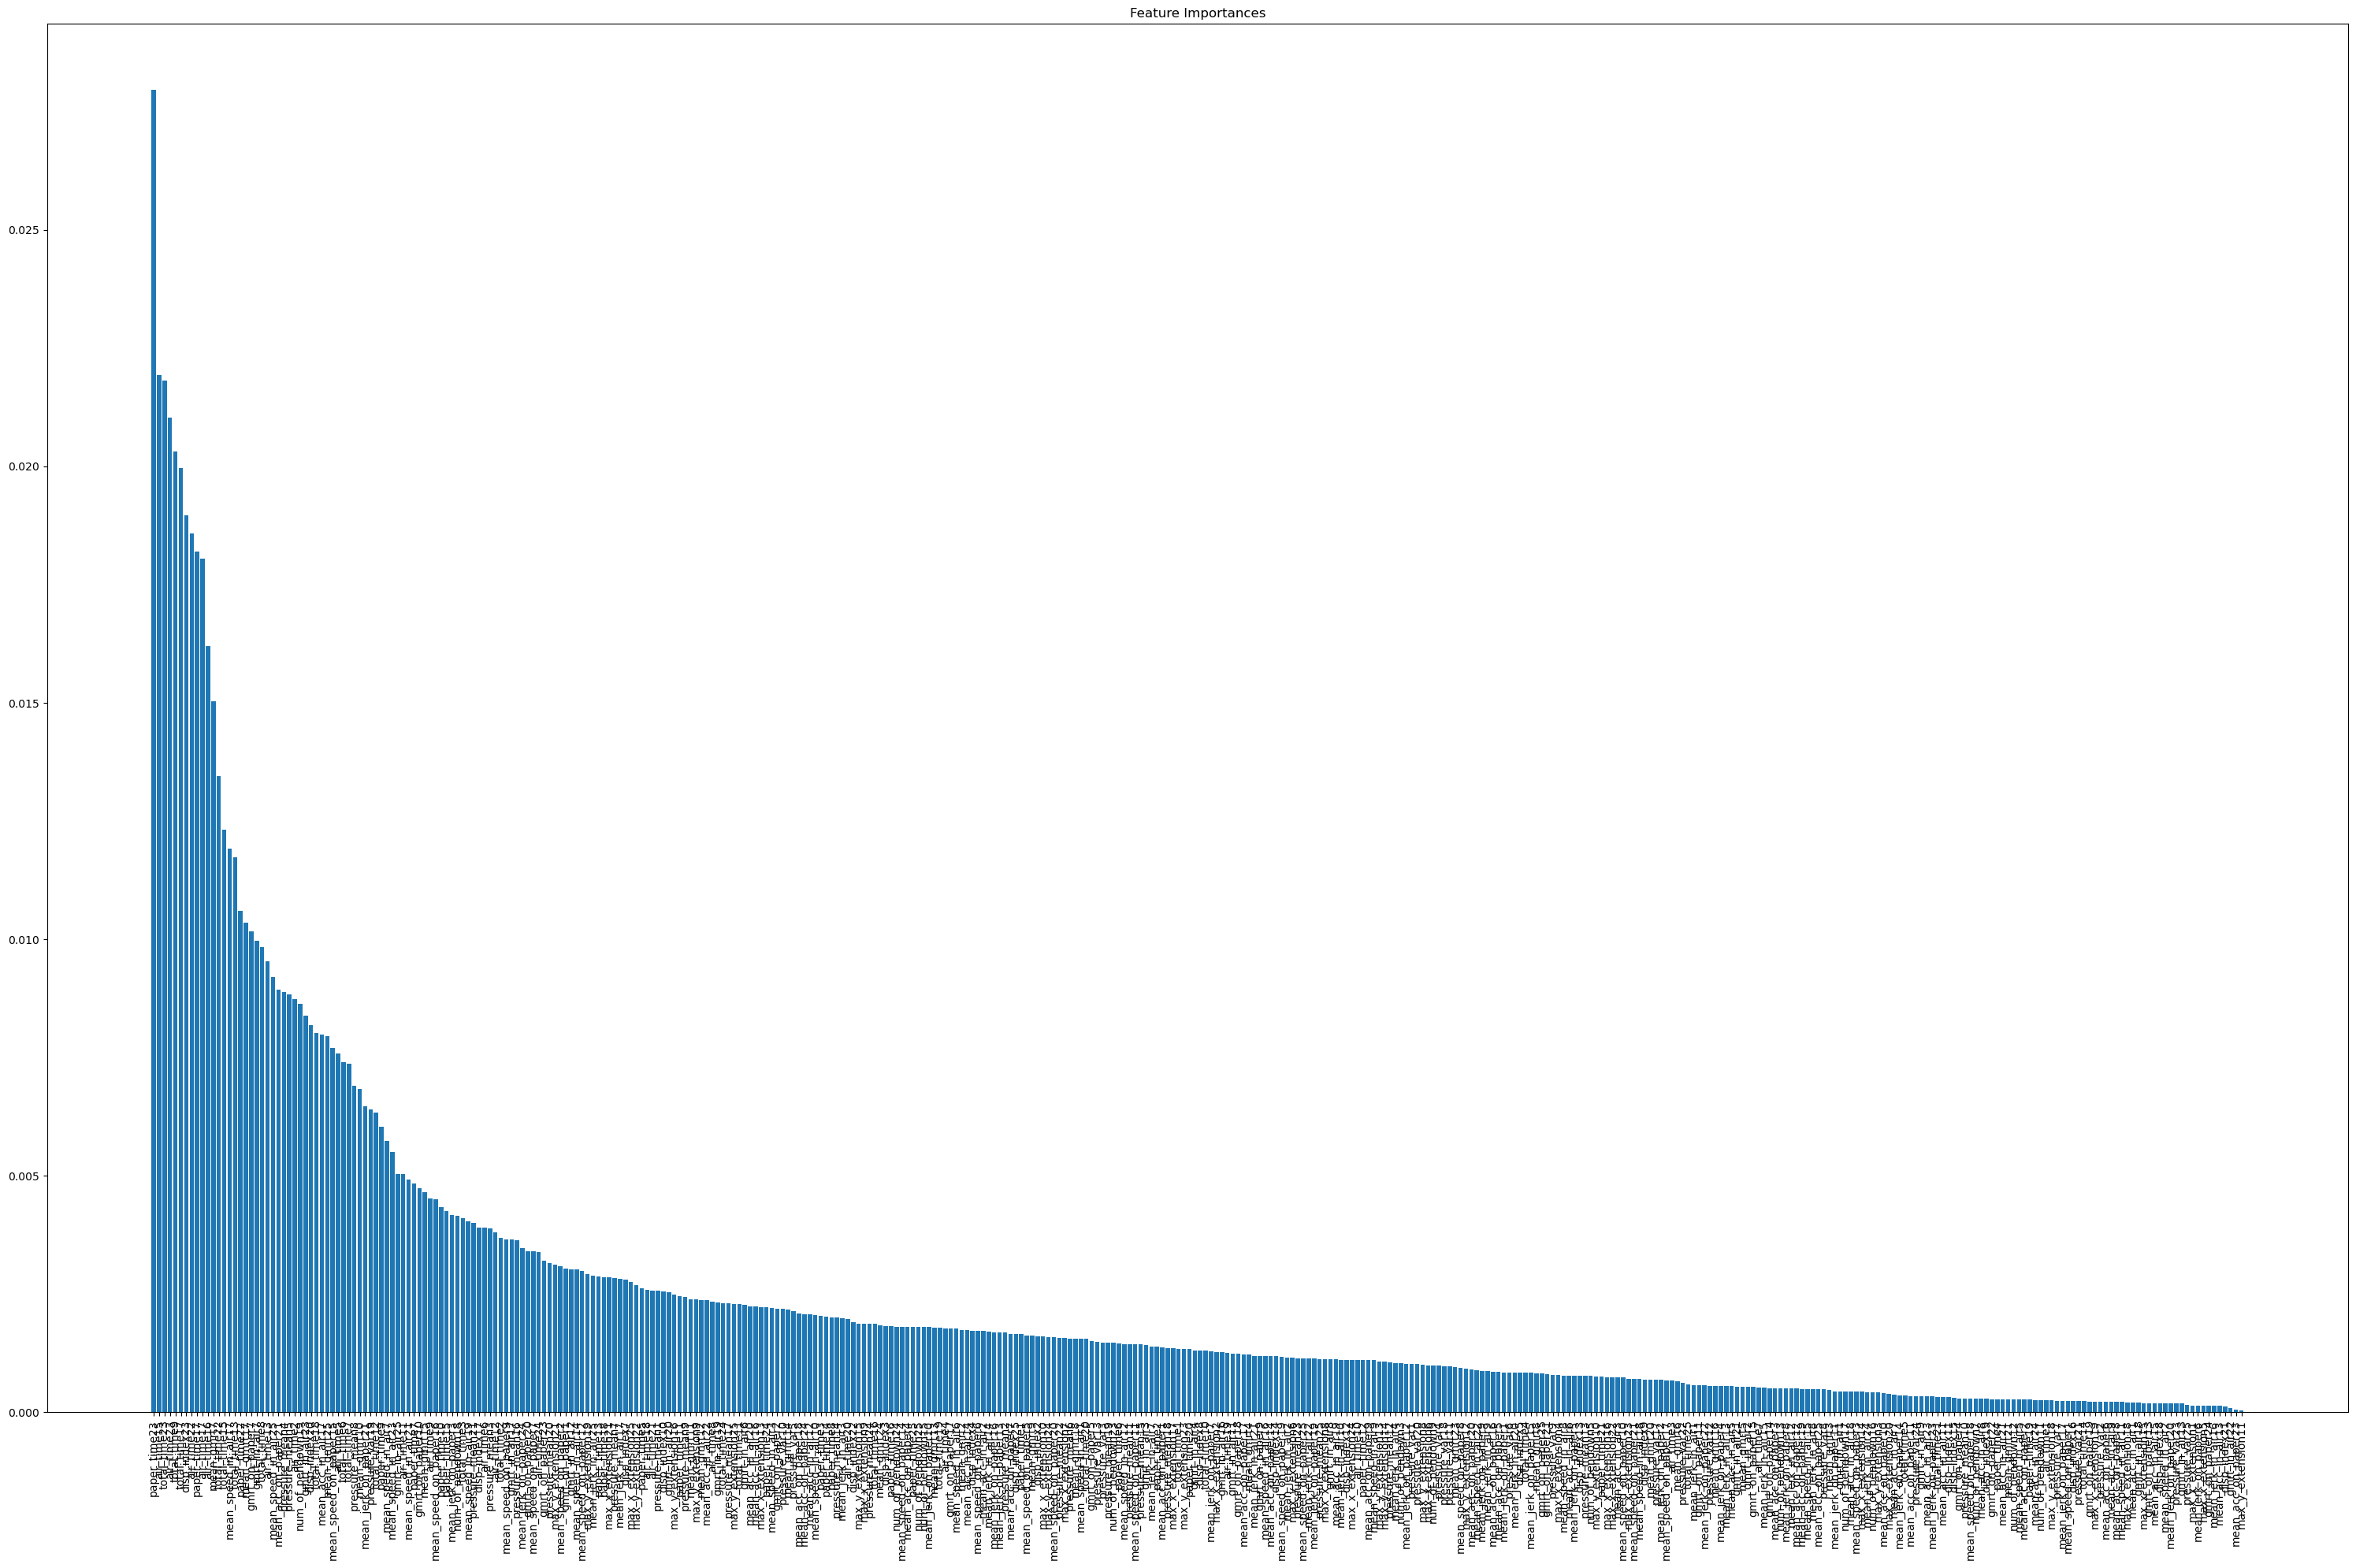

In [137]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=random_state)

# Train the model
rf_classifier.fit(X_train, y_train)


# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Remove features with importance values of 0 from sorted indices
indices = [index for index in indices if importances[index] != 0]
importances = importances[indices]
feature_names = feature_names[indices]

# Max and min value of importances
max_importance_value = max(importances)
min_importance_value = min(importances)

print(f"Max value: {max_importance_value}")
print(f"Min value: {min_importance_value}")
print(f"Total Number of Feature Importances: {len(importances)}")

#  Plot feature importances
plt.figure(figsize=get_figure_size(len(importances)))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances, align="center")
plt.xticks(range(len(indices)), feature_names, rotation=90)
plt.tight_layout()
plt.show()

# Feature extraction

## Splitting the important features into 21 subset

In [138]:
increment = (max_importance_value - min_importance_value) / 20

value_range = np.arange(
    min_importance_value, max_importance_value + increment, increment
)

# Create pairs of consecutive values using list comprehension
pairs_of_values = [[value, max_importance_value] for value in value_range]

print(f"Difference Value: {increment}")
print(f"Value Range Length: {len(value_range)}")
print(f"Number paired value:")
pairs_of_values

Difference Value: 0.0013958637927716636
Value Range Length: 21
Number paired value:


[[4.093931198393649e-05, 0.027958215167417207],
 [0.0014368031047556002, 0.027958215167417207],
 [0.0028326668975272636, 0.027958215167417207],
 [0.004228530690298928, 0.027958215167417207],
 [0.005624394483070591, 0.027958215167417207],
 [0.007020258275842254, 0.027958215167417207],
 [0.00841612206861392, 0.027958215167417207],
 [0.009811985861385583, 0.027958215167417207],
 [0.011207849654157246, 0.027958215167417207],
 [0.01260371344692891, 0.027958215167417207],
 [0.013999577239700573, 0.027958215167417207],
 [0.015395441032472238, 0.027958215167417207],
 [0.0167913048252439, 0.027958215167417207],
 [0.018187168618015562, 0.027958215167417207],
 [0.019583032410787227, 0.027958215167417207],
 [0.02097889620355889, 0.027958215167417207],
 [0.022374759996330554, 0.027958215167417207],
 [0.02377062378910222, 0.027958215167417207],
 [0.02516648758187388, 0.027958215167417207],
 [0.026562351374645545, 0.027958215167417207],
 [0.027958215167417207, 0.027958215167417207]]

# Select best model with fixed features

In [139]:
# Important features to dataframe
important_df = pd.DataFrame(
    importances, index=feature_names, columns=["Importance"]
)

best_model_with_features = []

for _min, _max in pairs_of_values:
    filtered_features = important_df[
        (important_df["Importance"] >= _min)
        & (important_df["Importance"] <= _max)
    ]

    filtered_features_indices = filtered_features.index.tolist()

    if len(filtered_features) < 2:
        continue

    print(f"Number of Features: {len(filtered_features)}\tRange: {_min} - {_max}")

    # Calculate the correlation matrix
    temp = filtered_features_indices
    temp.append("class_encoded")
    correlation_matrix = df[temp].corr()
    correlation_matrix_abs = correlation_matrix.abs()

    # identify highly correlated features
    upper_tri = correlation_matrix_abs.where(
        np.triu(np.ones(correlation_matrix_abs.shape), k=1).astype(np.bool_)
    )

    high_corr_features = [
        column for column in upper_tri.columns if any(upper_tri[column] >= 0.9)
    ]

    # Drop the highly correlated features
    low_features = df[filtered_features_indices].drop(columns=high_corr_features)
    low_features_corr = low_features.corr()

    print(
        f"Number of Features After reducing: {len(low_features_corr)}\tRange: {_min} - {_max}"
    )

    # Get the feature names within the specified range
    selected_features = low_features.drop("class_encoded", axis=1).columns

    # Train a new model using only the selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    clf = LazyClassifier(
        verbose=0,
        ignore_warnings=True,
        custom_metric=None,
        random_state=random_state,
    )

    models, predictions = clf.fit(X_train_selected, X_test_selected, y_train, y_test)

    # print("Best Model:")
    # print(models.iloc[0])
    # print("Best Prediction:")
    # print(predictions.iloc[0])

    best_model_with_features.append(
        {
            "model_name": models.iloc[0].name,
            "model_accuracy": models.iloc[0]["Accuracy"],
            "model_balance_accuracy": models.iloc[0]["Balanced Accuracy"],
            "model_roc_auc": models.iloc[0]["ROC AUC"],
            "model_f1_score": models.iloc[0]["F1 Score"],

            "prediction_accuracy": predictions.iloc[0]["Accuracy"],
            "prediction_balance_accuracy": predictions.iloc[0]["Balanced Accuracy"],
            "prediction_roc_auc": predictions.iloc[0]["ROC AUC"],
            "prediction_f1_score": predictions.iloc[0]["F1 Score"],
            
            "sorted_value": abs(
                models.iloc[0]["Accuracy"]
                + models.iloc[0]["Balanced Accuracy"]
                + models.iloc[0]["ROC AUC"]
                + models.iloc[0]["F1 Score"]
                - len(selected_features)
            ),

            "feature_length": len(selected_features),
            "features": selected_features,
        }
    )

    clear_output()


best_model_with_features

[{'model_name': 'AdaBoostClassifier',
  'model_accuracy': 0.9428571428571428,
  'model_balance_accuracy': 0.9337121212121212,
  'model_roc_auc': 0.9337121212121212,
  'model_f1_score': 0.9428571428571428,
  'prediction_accuracy': 0.9428571428571428,
  'prediction_balance_accuracy': 0.9337121212121212,
  'prediction_roc_auc': 0.9337121212121212,
  'prediction_f1_score': 0.9428571428571428,
  'sorted_value': 298.24686147186145,
  'feature_length': 302,
  'features': Index(['paper_time23', 'air_time15', 'total_time23', 'total_time9',
         'total_time17', 'disp_index23', 'air_time22', 'paper_time17',
         'air_time16', 'mean_gmrt7',
         ...
         'mean_speed_in_air2', 'mean_jerk_on_paper20', 'pressure_var23',
         'pressure_var25', 'max_x_extension1', 'mean_jerk_on_paper6',
         'max_x_extension5', 'disp_index21', 'mean_acc_on_paper23',
         'max_y_extension11'],
        dtype='object', length=302)},
 {'model_name': 'ExtraTreesClassifier',
  'model_accuracy': 0.

## Sort the model list with highest model, prediction value and lowest features

In [140]:
sorted_model_data_list = sorted(best_model_with_features, key=sorting_model_key)

sorted_model_data_list = [
    entry
    for entry in sorted_model_data_list
    if all(
        value >= 0.88
        for key, value in entry.items()
        if key.endswith("_accuracy")
        or key.endswith("_roc_auc")
        or key.endswith("_f1_score")
    )
]

pd.DataFrame(sorted_model_data_list, columns=["model_name", "feature_length", "model_accuracy", "prediction_accuracy"])
# sorted_model_data_list

,model_name,feature_length,model_accuracy,prediction_accuracy
0,LGBMClassifier,5,0.89,0.89
1,LGBMClassifier,21,0.91,0.91
2,ExtraTreesClassifier,28,0.89,0.89
3,LGBMClassifier,33,0.89,0.89
4,ExtraTreesClassifier,65,0.91,0.91
5,ExtraTreesClassifier,147,0.89,0.89
6,AdaBoostClassifier,302,0.94,0.94


# Feature correlation and plotting

## Correlation of best combination

In [157]:
____model_select = sorted_model_data_list[2]
best_model_features_list = list(____model_select['features'])
best_model_features_list.append("class_encoded")
correlation_matrix = df[best_model_features_list].corr()

## Correlation Heatmap

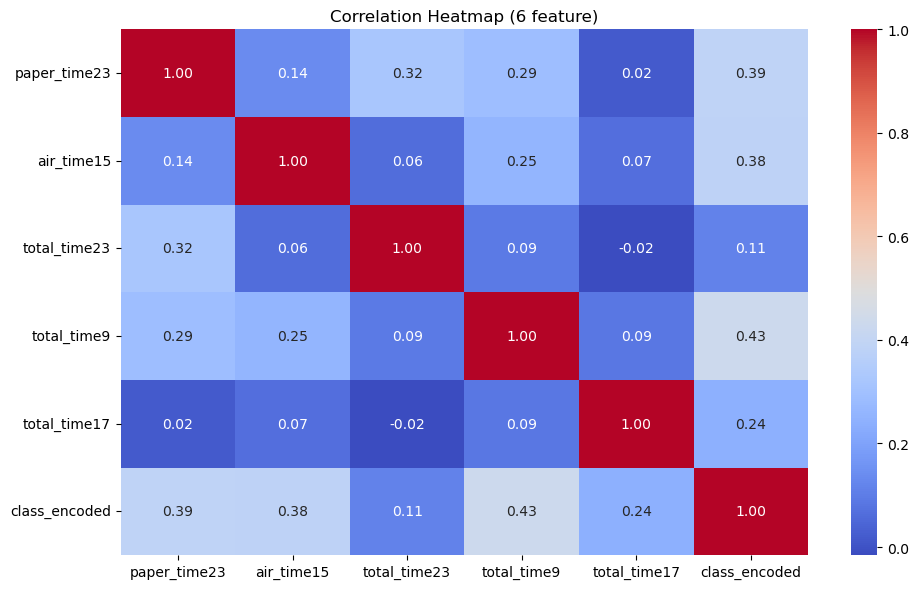

In [158]:
plt.figure(figsize=get_figure_size(len(best_model_features_list)))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Heatmap ({len(best_model_features_list)} feature)")
plt.tight_layout()
plt.show()

# Model tuning and Scores

## Model Tuning

### Split data

In [159]:
lowest_features_name = list(____model_select["features"])

__X = X[lowest_features_name]
# scaler = StandardScaler()
# __X = pd.DataFrame(scaler.fit_transform(__X), columns=__X.columns)

__X_train, __X_test, __y_train, __y_test = train_test_split(
    __X, y, test_size=0.2, random_state=random_state
)

### Check Lazypredict Classifier Model Accuracy vs Our Classifier Accuracy

In [160]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Create the Classifier
classifier = ExtraTreesClassifier(random_state=random_state)

# Train it
classifier.fit(__X_train, __y_train)

# Prediction
__y_predict = classifier.predict(__X_test)

# Calculate score
old_accuracy = accuracy_score(__y_test, __y_predict)
old_precision = precision_score(__y_test, __y_predict)
old_recall = recall_score(__y_test, __y_predict)
old_f1 = f1_score(__y_test, __y_predict)
old_classification_reports = classification_report(__y_test, __y_predict)

# Check Lazypredict accuracy == __y_predict accuracy
print(f"Lazypredict {____model_select['model_name']} Model vs Our {____model_select['model_name']}: {old_accuracy == ____model_select['model_accuracy']}")
print(f"Our {____model_select['model_name']}: \n{classification_report(__y_test, __y_predict)}")
old_accuracy

Lazypredict LGBMClassifier Model vs Our LGBMClassifier: True
Our LGBMClassifier: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.82      0.82      0.82        11

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35



0.8857142857142857

### Grid Search

In [161]:
# from itertools import product


# def CustomGridSearch(n_estimators, max_depth, random_state):
#     grid_search = {"best_score": -1, "best_params": None}

#     param_combinations = product(n_estimators, max_depth)

#     for n_est, depth in param_combinations:
#         model = ExtraTreesClassifier(
#             n_estimators=n_est, max_depth=depth, random_state=random_state
#         )
#         model.fit(__X_train, __y_train)
#         __y_pred = model.predict(__X_test)
#         score = accuracy_score(__y_test, __y_pred)
#         if score > grid_search["best_score"]:
#             grid_search["best_score"] = score
#             grid_search["best_params"] = {"n_estimators": n_est, "max_depth": depth}

#     return grid_search

In [162]:
# Define the parameter grid for tuning
param_grid = {
    # 'n_estimators': list(range(20, 510, 10)),
    # 'max_depth': list(range(1, 21, 1)),
    "n_estimators": [20, 30, 40, 50],
    "max_depth": [1, 2, 3, 6],
}

# Create the Classifier
__classifier = ExtraTreesClassifier(random_state=random_state)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=__classifier, param_grid=param_grid, scoring="accuracy")
# grid_search = CustomGridSearch(
#     n_estimators=param_grid["n_estimators"],
#     max_depth=param_grid["max_depth"],
#     random_state=random_state,
# )

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# clear_output()

# Print the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# best_params = grid_search["best_params"]
# best_score = grid_search["best_score"]
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 6, 'n_estimators': 50}
Best Score: 0.9206349206349206


In [163]:
# Get the best estimator
___classifier = grid_search.best_estimator_
# ___classifier = ExtraTreesClassifier(n_estimators=best_params["n_estimators"], max_depth=best_params['max_depth'], random_state=random_state)

# Train it
___classifier.fit(__X_train, __y_train)

# Prediction
___y_predict = ___classifier.predict(__X_test)


print(f"{____model_select['model_name']}: \n{classification_report(__y_test, ___y_predict)}")

LGBMClassifier: 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.78      0.64      0.70        11

    accuracy                           0.83        35
   macro avg       0.81      0.78      0.79        35
weighted avg       0.82      0.83      0.82        35



## Precision, Recall, F1 Score and Classification Report

In [164]:
accuracy = accuracy_score(__y_test, ___y_predict)
precision = precision_score(__y_test, ___y_predict)
recall = recall_score(__y_test, ___y_predict)
f1 = f1_score(__y_test, ___y_predict)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n {classification_report(__y_test, ___y_predict)}")

Accuracy: 0.8285714285714286
Precision: 0.7777777777777778
Recall: 0.6363636363636364
F1 Score: 0.7000000000000001
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.78      0.64      0.70        11

    accuracy                           0.83        35
   macro avg       0.81      0.78      0.79        35
weighted avg       0.82      0.83      0.82        35



# Compare LazyPredict Classifier model vs Tuning Classifier model

In [165]:
compare_table = pd.DataFrame({
    "Name": ["Old Classifier Model", "Tuning Classifier Model"],
    "Accuracy": [old_accuracy, accuracy],
    "Precision": [old_precision, precision],
    "Recall": [old_recall, recall],
    "F1 Score": [old_f1, f1],
}).set_index("Name")

compare_table

,Accuracy,Precision,Recall,F1 Score
Name,,,,
Old Classifier Model,0.89,0.82,0.82,0.82
Tuning Classifier Model,0.83,0.78,0.64,0.70


In [166]:
___lazypredict = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    random_state=random_state,
)

models, predictions = ___lazypredict.fit(__X_train, __X_test, __y_train, __y_test)
clear_output()
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.89,0.89,0.89,0.89,0.04
XGBClassifier,0.86,0.87,0.87,0.86,0.05
RandomForestClassifier,0.86,0.87,0.87,0.86,0.22
ExtraTreesClassifier,0.89,0.87,0.87,0.89,0.17
AdaBoostClassifier,0.86,0.85,0.85,0.86,0.22
DecisionTreeClassifier,0.77,0.78,0.78,0.78,0.02
BaggingClassifier,0.80,0.78,0.78,0.80,0.05
ExtraTreeClassifier,0.74,0.76,0.76,0.75,0.02
LabelPropagation,0.80,0.76,0.76,0.80,0.02


# Plotting

## Precision Recall Curve (Model)

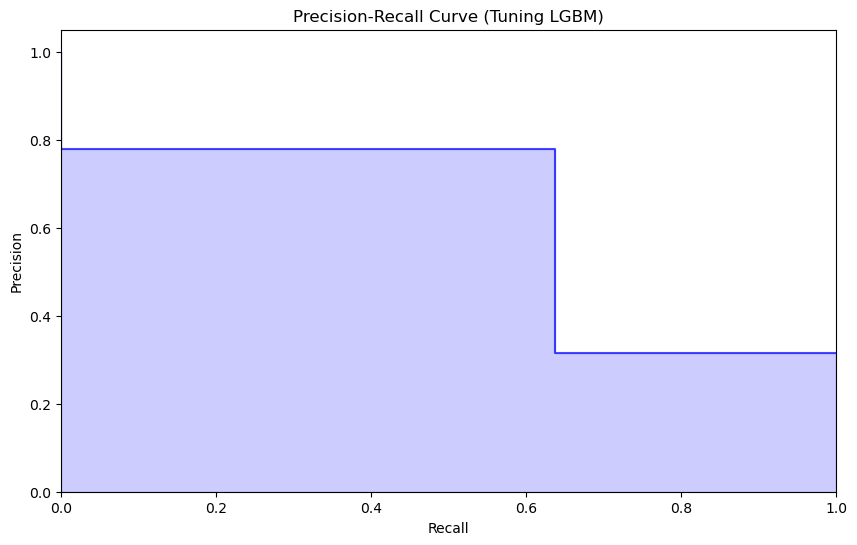

In [167]:
precision, recall, _ = precision_recall_curve(__y_test, ___y_predict)

plt.figure(figsize=get_figure_size(len(precision)))
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (Tuning LGBM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

## F1 Score Curve (Model)

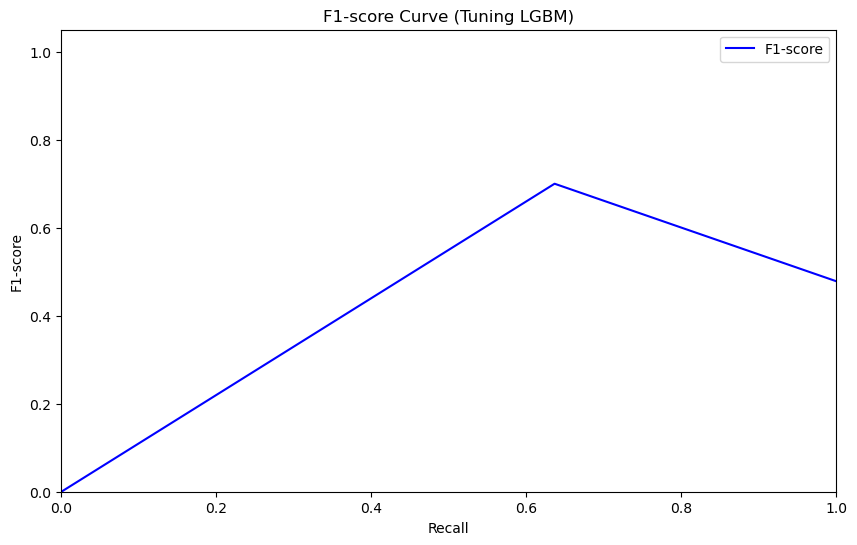

In [168]:
f1_values = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=get_figure_size(len(precision)))
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (Tuning LGBM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

## Confusion Matrix (Model)

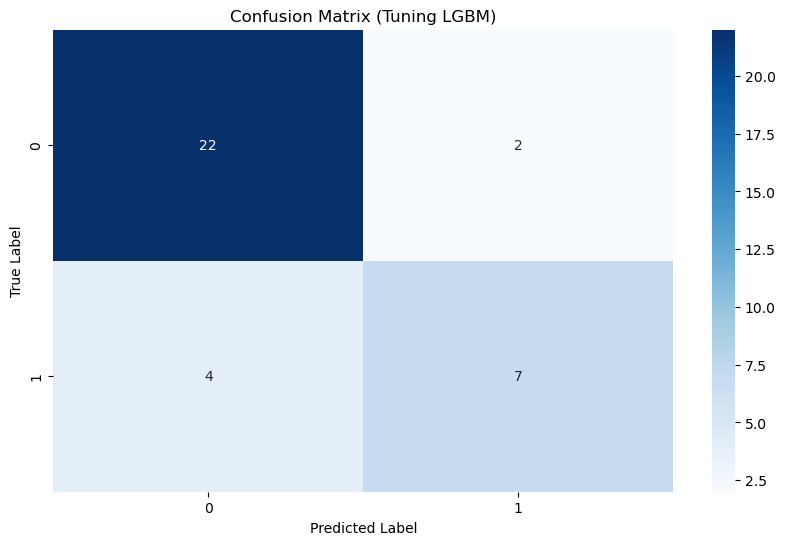

In [169]:
confusion_mat = confusion_matrix(__y_test, ___y_predict)
plt.figure(figsize=get_figure_size(len(confusion_mat)))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tuning LGBM)')
plt.show()

## ROC AUC Curve (Model)

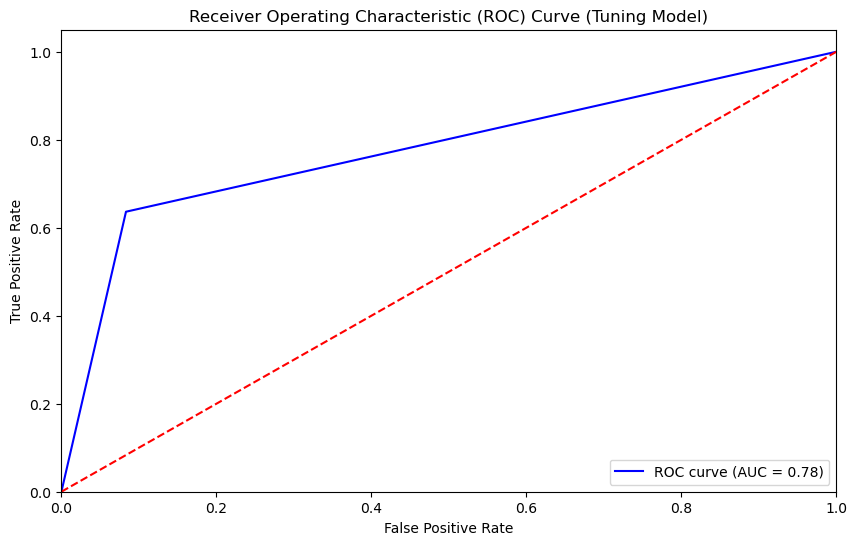

In [170]:
fpr, tpr, thresholds = roc_curve(__y_test, ___y_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=get_figure_size(len(fpr)))
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuning Model)')
plt.legend(loc="lower right")
plt.show()